In [2]:
from flair.datasets import CONLL_03
from flair.data import Corpus

In [3]:
corpus: Corpus = CONLL_03(base_path='resources/tasks')

2021-11-25 02:48:04,605 Reading data from resources/tasks/conll_03
2021-11-25 02:48:04,606 Train: resources/tasks/conll_03/eng.train
2021-11-25 02:48:04,606 Dev: resources/tasks/conll_03/eng.testa
2021-11-25 02:48:04,607 Test: resources/tasks/conll_03/eng.testb


In [4]:
print(corpus)

Corpus: 14987 train + 3466 dev + 3684 test sentences


In [5]:
# Izvēlēts izmantot Flair bibliotēkā atrodamus pre-trained embeddings
# Ņemot vērā Flair rekomendācijas, izvēlēts apkopot (StackedEmbeddings) klasiskos embeddings ar FlairEmbeddings
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings

# Flair klase SeqenceTagger, izmantojama tieši NER uzdevumiem
from flair.models import SequenceTagger

# Flair klase modeļa apmācībai
from flair.trainers import ModelTrainer

In [6]:
# Meklējamās anotācijas (label) izvēle
label_type = 'ner'

In [7]:
# Anotāciju vārdnīcas (label dictionary) izveide no korpusa ar definētas funkcijas palīdzību
label_dict = corpus.make_label_dictionary(label_type=label_type)
print(label_dict)

2021-11-25 02:48:14,249 Computing label dictionary. Progress:


100%|████████████████████████████████████████████████████████████████████████████████| 14987/14987 [00:00<00:00, 36359.81it/s]

2021-11-25 02:48:14,700 Corpus contains the labels: pos (#204567), np (#204567), ner (#204567)
2021-11-25 02:48:14,700 Created (for label 'ner') Dictionary with 18 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC
Dictionary with 18 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC


In [8]:
# Embeddingu inicializācija. Klasiskie embeddingi, kā arī Flair.
# Iespējams, vajadzētu pamainīt uz news-X-fast, lai uzlabotu ātrdarbību
embedding_types = [
    WordEmbeddings('glove'),
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward'),
]

embeddings = StackedEmbeddings(embeddings=embedding_types)

In [9]:
# Apmācāmā modeļa inicializācija. 
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_crf=True)

In [12]:
# Apmācības modeļa inicializācija ar izveidoto modeli un korpusu
trainer = ModelTrainer(tagger, corpus)

In [13]:
path = 'resources/taggers/eng-ner-flair-edit'

In [12]:
# Apmācības uzsākšana. write_wieghts ielikts, lai vēlāk iespējotu apmācības vizualizāciju.
# Checkpoint ielikts, lai varētu turpināt apmācību vēlāk
trainer.train(path,
              learning_rate=0.1,
              mini_batch_size=32,
              write_weights=True,
              checkpoint=True,
              max_epochs=5)

2021-11-25 01:20:14,291 ----------------------------------------------------------------------------------------------------
2021-11-25 01:20:14,293 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, b

{'test_score': 0.9112091791703443,
 'dev_score_history': [0.8701287910261737,
  0.9244870501177261,
  0.933859325163673,
  0.9418888234799428,
  0.9424611507769844],
 'train_loss_history': [0.25135253274989183,
  0.09998042281594814,
  0.07551038088250259,
  0.06447420963486752,
  0.05728609496758225],
 'dev_loss_history': [tensor(0.0801, device='cuda:0'),
  tensor(0.0473, device='cuda:0'),
  tensor(0.0408, device='cuda:0'),
  tensor(0.0346, device='cuda:0'),
  tensor(0.0346, device='cuda:0')]}

In [13]:
# Vizualizācija
from flair.visual.training_curves import Plotter

2021-11-25 01:33:26,177 ----------------------------------------------------------------------------------------------------
2021-11-25 01:33:26,179 WARNING: No LOSS found for test split in this data.
2021-11-25 01:33:26,181 Are you sure you want to plot LOSS and not another value?
2021-11-25 01:33:26,183 ----------------------------------------------------------------------------------------------------
2021-11-25 01:33:26,217 ----------------------------------------------------------------------------------------------------
2021-11-25 01:33:26,217 WARNING: No F1 found for test split in this data.
2021-11-25 01:33:26,217 Are you sure you want to plot F1 and not another value?
2021-11-25 01:33:26,218 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in resources/taggers/eng-ner-flair/training.png


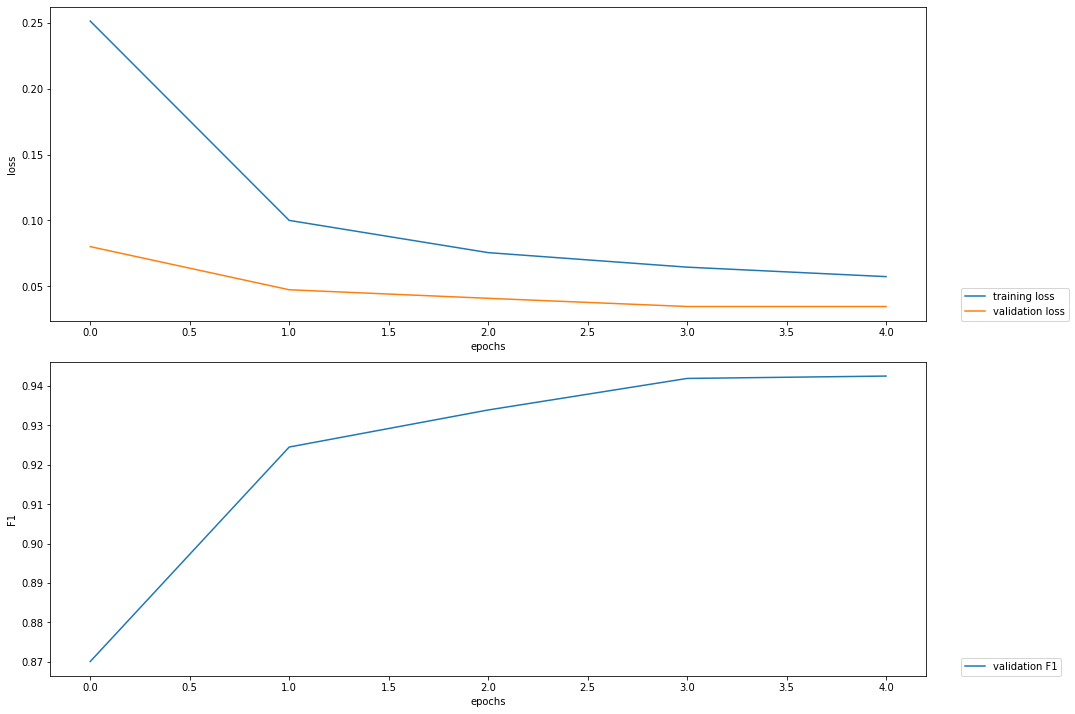

Weights plots are saved in resources/taggers/eng-ner-flair/weights.png


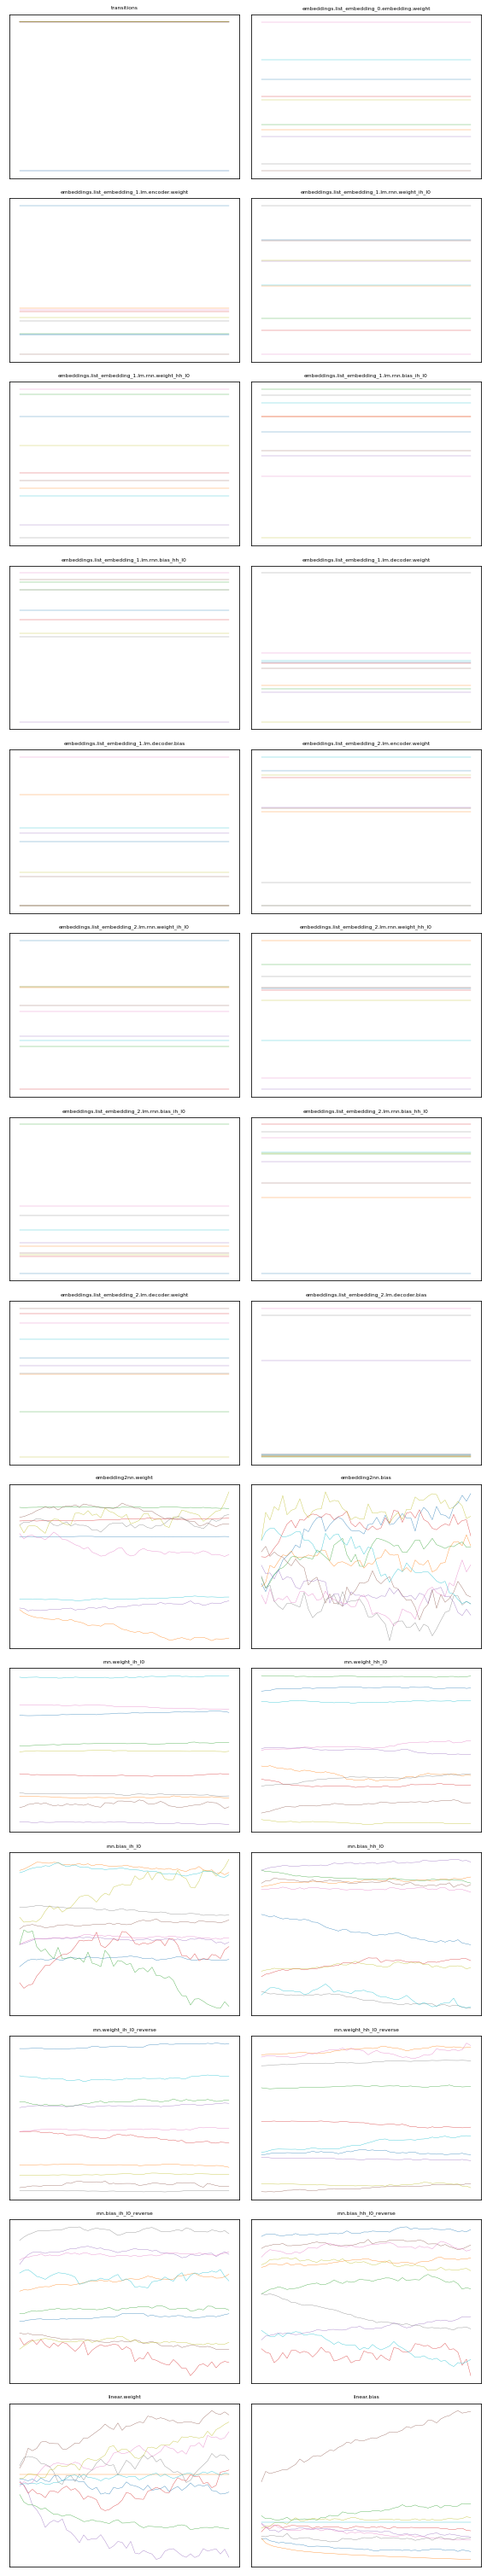

In [14]:
plotter = Plotter()

#varētu būt, ka path uz failiem ir cits
plotter.plot_training_curves(path + '/loss.tsv')
plotter.plot_weights(path + '/weights.txt')

In [ ]:
# Apmācības atsākšana no checkpointa
# Iepriekš uzsāktā modeļa ielāde
# path jādefinē iepriekš vēlams

trained_model = SequenceTagger.load(path + '/checkpoint.pt')

# līdz šīm labākā modeļa apmācības atsākšana
trainer.resume(trained_model,
               base_path=path + '-resume',
               max_epochs=100,
               checkpoint=True
               )

2021-11-25 01:35:25,896 loading file resources/taggers/eng-ner-flair/checkpoint.pt
2021-11-25 01:35:27,247 ----------------------------------------------------------------------------------------------------
2021-11-25 01:35:27,248 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): L

In [14]:
# Apmācības atsākšana no checkpointa
# Iepriekš uzsāktā modeļa ielāde
# path jādefinē iepriekš vēlams

trained_model = SequenceTagger.load(path + '-resume' + '/checkpoint.pt')

# līdz šīm labākā modeļa apmācības atsākšana
trainer.resume(trained_model,
               base_path=path + '-resume2',
               max_epochs=90,
               checkpoint=True
               )

2021-11-25 02:49:51,691 loading file resources/taggers/eng-ner-flair-resume/checkpoint.pt
2021-11-25 02:49:52,758 ----------------------------------------------------------------------------------------------------
2021-11-25 02:49:52,759 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_drop